In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Used to divide data into training/testing
from sklearn.model_selection import train_test_split
# Used to scale data, i.e  make them standardized
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
energy = pd.read_csv ("energydata_complete (1).csv")

In [3]:
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
# selecting the needed column
energy_linear = energy[["T2", "T6"]].sample(15, random_state = 2)
energy_linear.head()

,T2,T6
1117,17.426667,-4.238889
16275,22.760000,14.690000
13272,21.230000,8.926667
3160,21.100000,7.690000
19210,21.856667,10.800000


<AxesSubplot:xlabel='T2', ylabel='T6'>

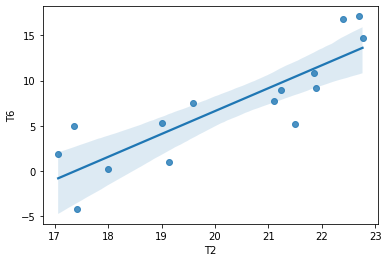

In [5]:
# chech if there is a linear relationship
sns.regplot(x = "T2", y = "T6", data = energy_linear)

In [6]:
# dropping "date" and "light" columns
eng = energy
eng = eng.drop(columns = ["date", "lights"])
eng.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   T1           19735 non-null  float64
 2   RH_1         19735 non-null  float64
 3   T2           19735 non-null  float64
 4   RH_2         19735 non-null  float64
 5   T3           19735 non-null  float64
 6   RH_3         19735 non-null  float64
 7   T4           19735 non-null  float64
 8   RH_4         19735 non-null  float64
 9   T5           19735 non-null  float64
 10  RH_5         19735 non-null  float64
 11  T6           19735 non-null  float64
 12  RH_6         19735 non-null  float64
 13  T7           19735 non-null  float64
 14  RH_7         19735 non-null  float64
 15  T8           19735 non-null  float64
 16  RH_8         19735 non-null  float64
 17  T9           19735 non-null  float64
 18  RH_9         19735 non-null  float64
 19  T_ou

In [8]:
# Rescalling data to be train on model
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(eng)
norm_df = pd.DataFrame(norm_data, columns = eng.columns)

In [9]:
# Selcting dependent and independent variable for training model
features_df = norm_df.drop('Appliances', axis=1)
target = norm_df['Appliances']

In [10]:
# Spltting data 70/30
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)

In [11]:
# selecting features and target data. 
x = x_train[['T2']]
y = x_train['T6']
fea = x_test[['T2']]
tar = x_test['T6']

In [12]:
# Initializing model
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x, y)
#obtain predictions
predicted_values = linear_model.predict(fea)

In [13]:
# Computing model performance
mae = mean_absolute_error(tar, predicted_values)
mse = mean_squared_error(tar, predicted_values)
rss = np.sum(np.square(tar - predicted_values))
rmse = np.sqrt(mse)
r_square = r2_score(tar, predicted_values)

print(mae, mse, rss, rmse, r_square)

0.08216970202681716 0.011166285957258446 66.11557915292725 0.10567064851347532 0.6427789637197382


In [14]:
# Multiple liner Regression
model = LinearRegression()
#fit the model to the training dataset
model.fit(x_train, y_train)
#obtain predictions
pred_values = model.predict(x_test)
# Computing model performance
mae = mean_absolute_error(y_test, pred_values)
rss = np.sum(np.square(y_test - pred_values))
mse = mean_squared_error(y_test, pred_values)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, pred_values)

print(mae, mse, rss, rmse, r_square)

0.05013362397742955 0.007658778867195367 45.34762967266377 0.0875144494766171 0.14890246319303535


In [15]:
# Training a Ridge Regression model with alpha value of 0.4
ridgeReg = Ridge(alpha=0.4)
ridgeReg.fit(x_train, y_train)
pred_ridge = ridgeReg.predict(x_test)

# Evaluating model performance
mae = mean_absolute_error(y_test, pred_ridge)
mse = mean_squared_error(y_test, pred_ridge)
rss = np.sum(np.square(y_test - pred_ridge))
rmse = np.sqrt(mse)
r_square = r2_score(y_test, pred_ridge)

print(mae, mse, rss, rmse, r_square)

0.0500874458409239 0.007662176129398582 45.367744862169005 0.08753385704628 0.1485249354509265


In [16]:
# Training a Lasso Regression model with alpha value of 0.001
lassoReg = Lasso(alpha=0.001)
lassoReg.fit(x_train, y_train)
pred_lasso = lassoReg.predict(x_test)

# Evaluating model performance
mae = mean_absolute_error(y_test, pred_lasso)
mse = mean_squared_error(y_test, pred_lasso)
rss = np.sum(np.square(y_test - pred_lasso))
rmse = np.sqrt(mse)
r_square = r2_score(y_test, pred_lasso)

print(mae, mse, rss, rmse, r_square)

0.055256639821262256 0.008757535449401907 51.85336739590869 0.09358170467245137 0.026800880567125818


In [17]:
# The weights of each variablein ascending order
weights = pd.Series(model.coef_, x_train.columns).sort_values()
weights

RH_2          -0.456698
T_out         -0.321860
T2            -0.236178
T9            -0.189941
RH_8          -0.157595
RH_out        -0.077671
RH_7          -0.044614
RH_9          -0.039800
T5            -0.015657
T1            -0.003281
rv1            0.000770
rv2            0.000770
Press_mm_hg    0.006839
T7             0.010319
Visibility     0.012307
RH_5           0.016006
RH_4           0.026386
T4             0.028981
Windspeed      0.029183
RH_6           0.038049
RH_3           0.096048
T8             0.101995
Tdewpoint      0.117758
T6             0.236425
T3             0.290627
RH_1           0.553547
dtype: float64

In [18]:
def get_weights(model, feature, col_name):
    weights = pd.Series(model.coef_, feature.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    # weights_df[col_name] =  weights_df[col_name].round(3)
    return weights_df

In [19]:
linear_weight = get_weights(model, x_train, 'Linear_Model_Weight')
ridge_weight = get_weights(ridgeReg, x_train, 'Ridge_Weight')
lasso_weight = get_weights(lassoReg, x_train, 'Lasso_Weight')

In [20]:
all_weight = pd.merge(linear_weight, ridge_weight, on='Features')
all_weight = pd.merge(all_weight, lasso_weight, on='Features')
all_weight

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,RH_2,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2,-0.236178,-0.201397,0.000000
3,T9,-0.189941,-0.188916,-0.000000
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH_7,-0.044614,-0.045977,-0.000000
7,RH_9,-0.039800,-0.041367,-0.000000
8,T5,-0.015657,-0.019853,-0.000000
9,T1,-0.003281,-0.018406,0.000000
